Análisis de % de vacunados con primera y segunda dosis sobre el total de la población - Argentina 2021

In [8]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


Cantidad de primera dosis aplicadas hasta la fecha:  5955371
Cantidad de segunda dosis aplicadas hasta la fecha:  852040
Cantidad de dosis aplicadas hasta la fecha (1ra y 2da dosis):  6807411
Promedio de personas vacunadas con 1ra dosis:  13.0 %
Promedio de personas vacunadas con 2ra dosis:  1.86 %
Promedio de personas vacunadas con 1ra y 2da dosis:  14.86 %


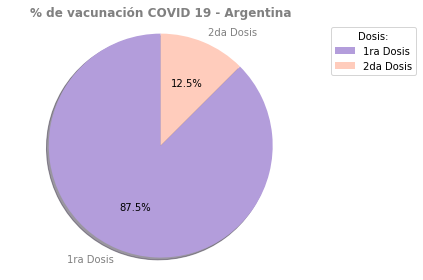

In [10]:
#leemos el dataset y creamos nuestro dataframe con estos datos
url="https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19VacunasAgrupadas.csv"
data=pd.read_csv(url,delimiter= ",")

#Agrupamos total de vacunas por jurisdiccion 
df1 = data.groupby("jurisdiccion_nombre", as_index=False).sum()
#Suma cantidad de vacunas de 1 y 2 dosis
dosis1 = df1[['primera_dosis_cantidad']].sum()
dosis2 = df1[['segunda_dosis_cantidad']].sum()
#Convertimos el total (DF) a valor numerico (int)
total1 = int(dosis1)
total2 = int(dosis2)
#poblacion estimada al 1 julio (INDEC)
habitantes = 45808747
#Total dosis aplicadas (1 y 2 dosis)
total_dosis = total1+total2
#Analisis de datos obtenidos
print("Cantidad de primera dosis aplicadas hasta la fecha: ", total1)
print("Cantidad de segunda dosis aplicadas hasta la fecha: ", total2)
print("Cantidad de dosis aplicadas hasta la fecha (1ra y 2da dosis): ",total_dosis )
print("Promedio de personas vacunadas con 1ra dosis: ", round(total1*100/habitantes,2),"%" )
print("Promedio de personas vacunadas con 2ra dosis: ", round(total2*100/habitantes,2),"%" )
print("Promedio de personas vacunadas con 1ra y 2da dosis: ", round(total_dosis*100/habitantes,2),"%")

#labels
labels = ['1ra Dosis','2da Dosis']
#colors
colors = ['#B39DDB','#FFCCBC']
#array con total de vacunas aplicadas de 1ra y 2da dosis
totales = np.array([df1[['primera_dosis_cantidad']].sum(),df1[['segunda_dosis_cantidad']].sum()])
#Creamos la figura
fig,ax = plt.subplots()
#Grafico Pie
patches, texts, autotexts = ax.pie(totales, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
#Modificamos el color del texto de las etiquetas y etiquetas internas
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')

#configuramos la leyenda
plt.legend(title="Dosis:", bbox_to_anchor=(1.05, 1), loc='upper left')
#Agregamos titulo al grafico
plt.title("% de vacunación COVID 19 - Argentina", color="grey", fontsize=12,fontweight="bold")
#funcion para que el grafico sea "redondo"
ax.axis('equal')  
#automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()
#Display all open figures
plt.show()

